In [7]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import originpro as op
import sys

In [8]:
# Import Peak Area .txt files
path = r"C:\Users\flahertylab\OneDrive - Georgia Institute of Technology\Flaherty Research Group - ESS\01 - Raman Data\ESS-1-150_Cl Cutoff\Peak Area"
dirlist = os.listdir(path)

for index,file in enumerate(dirlist):
    file_path = path + '\\' + file
    curve_center, extension = os.path.splitext(file)
    curve_center = int(curve_center) # Now can reference header as integer instead of string

    if not index:
        df = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df = df.iloc[1:]
        pass
    else:
        df2 = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df2 = df2.iloc[1:]
        df[curve_center] = df2[curve_center]

df = df.apply(pd.to_numeric, errors='coerce')
df = df.set_index('Time (s)')

df

,1050,1100,1175,1190,120,1320,1450,150,1600,1750,...,625,650,710,770,810,820,860,890,925,990
Time (s),,,,,,,,,,,,,,,,,,,,,
0.000000,29029.781250,15208.152344,0.000000,17281.408203,223675.062500,111775.640625,85652.109375,393588.750000,5.175704e+05,26844.498047,...,197119.109375,202286.312500,191657.000000,152147.781250,6097.916992,2477.165283,50.785019,34332.761719,48812.781250,67210.875000
37.992950,33096.894531,64583.785156,1606.136963,7266.502441,232444.593750,172210.750000,35575.425781,411579.125000,4.568475e+05,63099.339844,...,215741.171875,185524.593750,186780.343750,206248.734375,41610.406250,5238.624512,4886.114258,577.078247,127652.179688,18256.851563
75.887238,0.000000,16980.238281,48568.960938,0.000000,211435.625000,78585.015625,98403.890625,399129.312500,3.627752e+05,82602.007813,...,0.000000,227449.453125,176213.343750,309612.312500,0.000000,1458.173828,910.988525,22564.722656,71362.906250,60353.484375
113.818036,8479.470703,37480.859375,5077.644043,1295.757202,211593.218750,788508.312500,196532.921875,394195.625000,1.757737e+06,5597.076172,...,141192.625000,191901.984375,192654.781250,118282.351563,14899.894531,434.754944,16551.904297,65183.167969,31102.666016,68286.328125
151.820862,0.000000,15372.473633,24153.744141,11474.464844,232632.250000,94716.515625,7521.849121,340710.375000,4.296146e+05,60010.406250,...,267622.406250,181218.968750,181477.281250,266827.062500,18480.960938,0.000000,9853.348633,27135.984375,67697.257813,61586.996094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75698.130971,0.000000,17998.855469,29952.207031,835.816772,152702.125000,72549.179688,2536.117432,260666.234375,1.515138e+05,162463.812500,...,179756.968750,179981.484375,162282.015625,229343.000000,92054.359375,5287.687012,3364.892822,31250.251953,59763.082031,55247.691406
75736.026574,20633.613281,20390.634766,0.000000,23268.187500,139520.000000,88740.414063,44769.851563,257010.953125,9.802591e+04,166833.031250,...,144614.578125,153340.250000,147210.656250,198687.015625,73453.710938,830.703186,500.088135,11593.132813,90212.382813,23840.791016
75773.962981,0.000000,17897.548828,56372.148438,0.000000,149780.031250,100043.210938,40803.585938,276605.000000,9.816362e+04,334973.875000,...,154575.500000,161828.093750,168304.937500,244746.078125,37020.964844,5800.550293,0.000000,30146.847656,62241.402344,79182.054688


In [9]:
with open('../bins.json', 'r') as f:
    column_bins = json.load(f)

binned_dfs = {}
columns = list(df.columns)



for bin_name, (low, high) in column_bins.items():
    selected_cols = [col for col in columns if low <= col <= high]
    if selected_cols:
        #selected_cols.insert(0, 'Time (s)')
        binned_dfs[bin_name] = df[selected_cols]



keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Diatomic Oxygen


,1050,1100,810,820,860,890,925,990
Time (s),,,,,,,,
0.000000,29029.781250,15208.152344,6097.916992,2477.165283,50.785019,34332.761719,48812.781250,67210.875000
37.992950,33096.894531,64583.785156,41610.406250,5238.624512,4886.114258,577.078247,127652.179688,18256.851563
75.887238,0.000000,16980.238281,0.000000,1458.173828,910.988525,22564.722656,71362.906250,60353.484375
113.818036,8479.470703,37480.859375,14899.894531,434.754944,16551.904297,65183.167969,31102.666016,68286.328125
151.820862,0.000000,15372.473633,18480.960938,0.000000,9853.348633,27135.984375,67697.257813,61586.996094
...,...,...,...,...,...,...,...,...
75698.130971,0.000000,17998.855469,92054.359375,5287.687012,3364.892822,31250.251953,59763.082031,55247.691406
75736.026574,20633.613281,20390.634766,73453.710938,830.703186,500.088135,11593.132813,90212.382813,23840.791016
75773.962981,0.000000,17897.548828,37020.964844,5800.550293,0.000000,30146.847656,62241.402344,79182.054688


In [10]:
# Check that this code grabbed all the columns

original_cols = set(df.columns)
binned_cols = set()
for subdf in binned_dfs.values():
    binned_cols.update(subdf.columns)

if original_cols == binned_cols:
    print("✅ All columns are correctly binned!")
else:
    print("❌ Column mismatch detected.")

    missing = original_cols - binned_cols
    extra = binned_cols - original_cols

    if missing:
        print("Columns missing from bins:", missing)
    if extra:
        print("Columns in bins that are not in original df:", extra)

✅ All columns are correctly binned!


In [11]:
for name, subdf in binned_dfs.items():
    subdf = subdf.copy()
    subdf.loc[:,'Total'] = subdf.sum(axis=1)
    binned_dfs[name] = subdf

keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Diatomic Oxygen


,1050,1100,810,820,860,890,925,990,Total
Time (s),,,,,,,,,
0.000000,29029.781250,15208.152344,6097.916992,2477.165283,50.785019,34332.761719,48812.781250,67210.875000,203220.218857
37.992950,33096.894531,64583.785156,41610.406250,5238.624512,4886.114258,577.078247,127652.179688,18256.851563,295901.934205
75.887238,0.000000,16980.238281,0.000000,1458.173828,910.988525,22564.722656,71362.906250,60353.484375,173630.513915
113.818036,8479.470703,37480.859375,14899.894531,434.754944,16551.904297,65183.167969,31102.666016,68286.328125,242419.045960
151.820862,0.000000,15372.473633,18480.960938,0.000000,9853.348633,27135.984375,67697.257813,61586.996094,200127.021486
...,...,...,...,...,...,...,...,...,...
75698.130971,0.000000,17998.855469,92054.359375,5287.687012,3364.892822,31250.251953,59763.082031,55247.691406,264966.820068
75736.026574,20633.613281,20390.634766,73453.710938,830.703186,500.088135,11593.132813,90212.382813,23840.791016,241455.056948
75773.962981,0.000000,17897.548828,37020.964844,5800.550293,0.000000,30146.847656,62241.402344,79182.054688,232289.368653


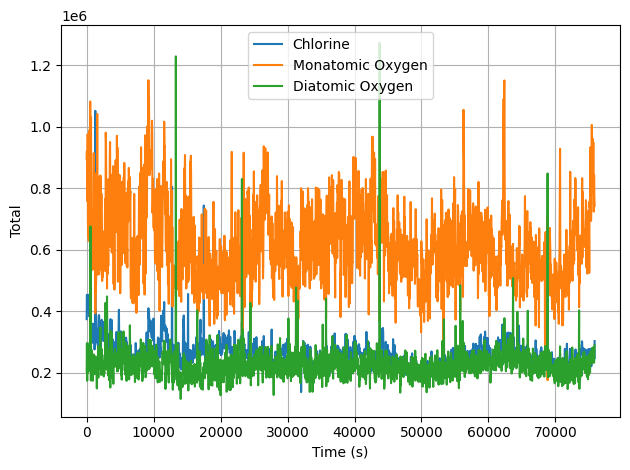

In [12]:
excluded_bins = {'Normalization', 'C2+'}

# Filter binned_dfs
filtered_binned_dfs = {
    name: df for name, df in binned_dfs.items()
    if name not in excluded_bins
}

for name, subdf in filtered_binned_dfs.items():
    
    plt.plot(subdf.index, subdf['Total'], label=name)

plt.xlabel('Time (s)')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
n = 10     # Number of points to average

for name, df in filtered_binned_dfs.items():
    df = df.copy()

    # Create a group ID based on position
    group_ids = [i // n for i in range(len(df))]

    # Convert index to numeric values (in case it's not)
    time_numeric = df.index.to_series().astype(float)

    # Combine data and time index into one DataFrame
    df['_Time'] = time_numeric.values
    grouped = df.groupby(group_ids)

    # Average data + time
    df_avg = grouped.mean()

    # Use averaged time as the new index
    df_avg.index = df_avg['_Time']
    df_avg = df_avg.drop(columns='_Time')

    # Save back
    filtered_binned_dfs[name] = df_avg

filtered_binned_dfs["Chlorine"]

,220,240,280,Total
_Time,,,,
170.764521,148858.451563,19639.205451,252334.470312,420832.127326
550.194866,126819.612891,7291.502637,234626.245312,368737.360840
929.637230,121458.478125,10832.567554,196814.721875,329105.767554
1309.056439,170476.400781,28116.929785,189146.406250,387739.736817
1688.509095,107537.769531,23374.938330,209789.396875,340702.104737
...,...,...,...,...
74161.369535,103680.593946,10403.339551,156983.978125,271067.911621
74540.801198,96242.742188,11772.281506,150858.131250,258873.154944
74920.231277,90641.187110,30302.942993,138311.809375,259255.939478


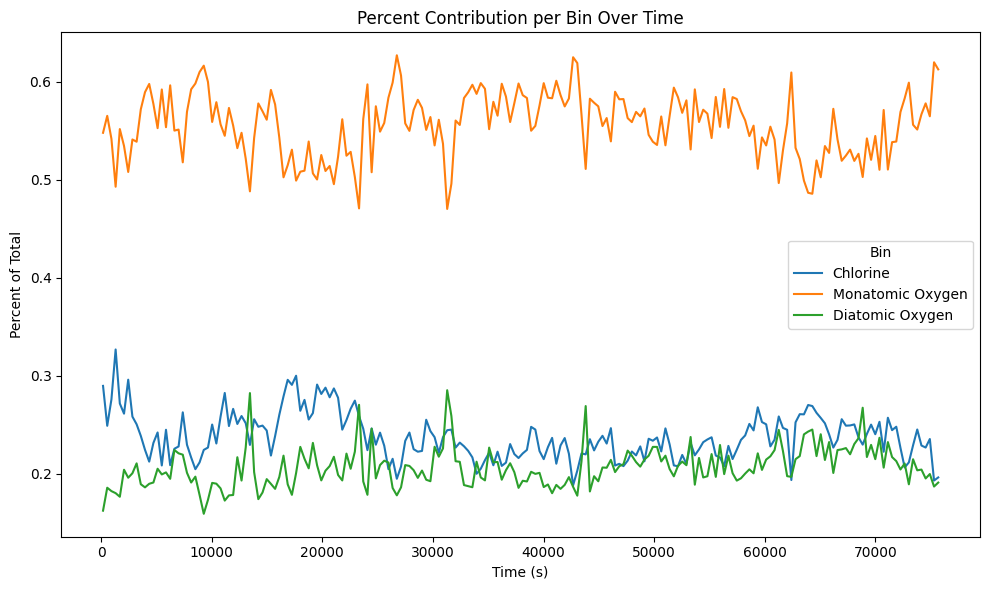

In [14]:
# Step 1: Combine "Total" columns across bins
totals_df = pd.DataFrame({
    name: df['Total']
    for name, df in filtered_binned_dfs.items()
})

# Step 2: Normalize each row to sum to 100%
percent_df = totals_df.div(totals_df.sum(axis=1), axis=0)

percent_df.plot(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Percent of Total')
plt.title('Percent Contribution per Bin Over Time')
plt.legend(title='Bin')
plt.tight_layout()
plt.show()

In [15]:
def origin_shutdown_exception_hook(extype, value, traceback):
    '''Ensures Origin gets shut down if there is an uncaught exception'''
    op.exit()
    sys.__excepthook__(extype, value, traceback)
if op and op.oext:
    sys.excepthook = origin_shutdown_exception_hook

if op.oext:
    op.set_show(True)

# Code here
dest_wks = op.new_sheet('w')

dest_wks.get_book().add_sheet().from_df(percent_df, addindex=True)

gr = op.new_graph(template='scatter')
gl_1 = gr[0]
p1 = gl_1.add_plot('[Book1]Sheet2!(A,B:D)', type='s')
gl_1.group(True, 0, 2)
#p1.color = '#335eff'
gl_1.rescale()

path = r"C:\Users\flahertylab\OneDrive - Georgia Institute of Technology\Flaherty Research Group - ESS\01 - Raman Data\ESS-1-150_Cl Cutoff"
op.save(path + '\\' + 'Peak Area Analysis.opju')

op.oext = True
if op.oext:
    op.exit()